In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [ ]:
customers=pd.read_csv('/content/customers.csv')
geolocation=pd.read_csv('/content/geolocation.csv')
order_items=pd.read_csv('/content/order_items.csv')
payments=pd.read_csv('/content/payments.csv')
orders=pd.read_csv('/content/orders.csv')
products=pd.read_csv('/content/products.csv')
sellers=pd.read_csv('/content/sellers.csv')


# Data Visualisation

### List all cities where customers are located

In [ ]:
cities=customers['customer_city'].unique()
city_df = pd.DataFrame(cities, columns=['customer_city'])
city_df


,customer_city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


## Count the number of orders placed in 2017

In [ ]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])

order_year=orders[orders['order_purchase_timestamp'].dt.year==2017]

order_count=len(order_year)
order_count

45101

## Find total sales per category

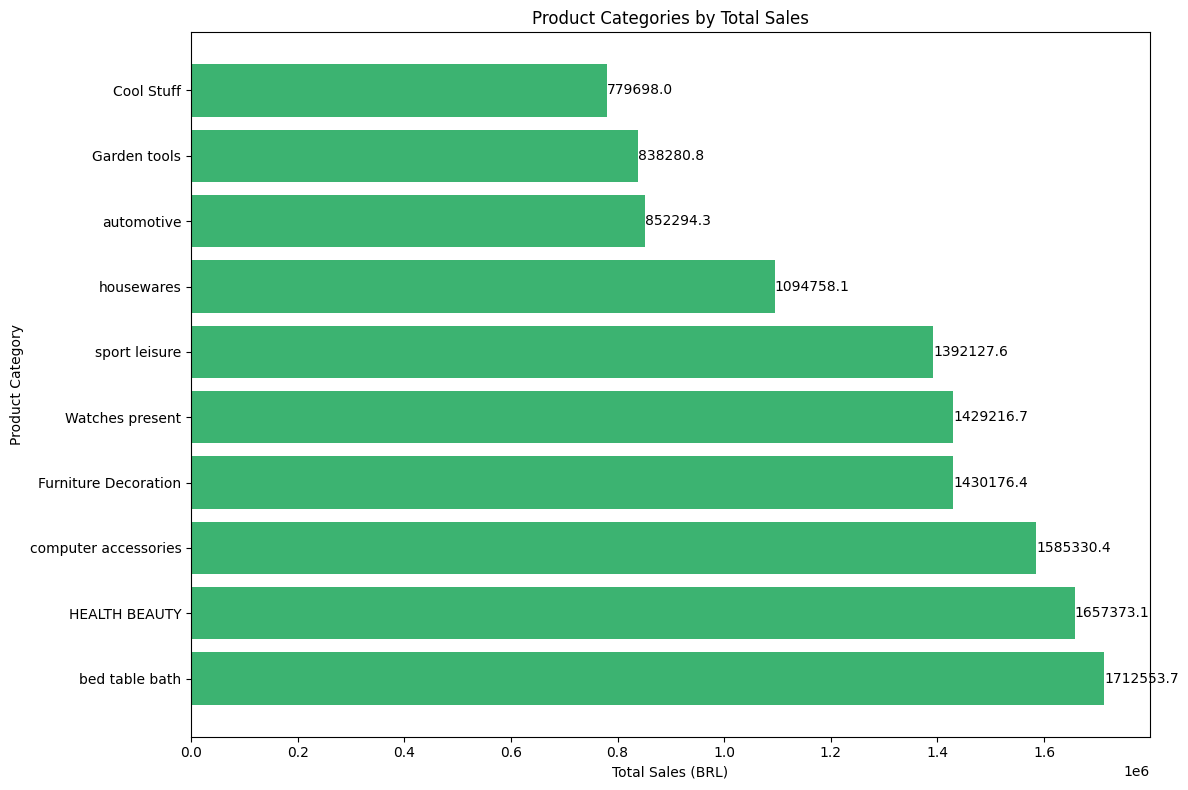

In [ ]:
merged_df = products.merge(order_items, on='product_id') \
                    .merge(payments, on='order_id')

sales_by_category = merged_df.groupby('product category')['payment_value'] \
                              .sum() \
                              .round(1) \
                              .reset_index()

sales_by_category.sort_values('product category', inplace=True)

top_categories = sales_by_category.sort_values('payment_value', ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_categories['product category'], top_categories['payment_value'], color='mediumseagreen')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}', va='center', ha='left')

plt.title('Product Categories by Total Sales')
plt.xlabel('Total Sales (BRL)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

## Calculate the percentage of orders that were paid in installments

In [ ]:
installment_payments = payments[payments['payment_installments'] > 1]
single_payments = payments[payments['payment_installments'] <= 1]

count_installments = len(installment_payments)
count_single = len(single_payments)
total = count_installments + count_single

installment_percentage = round((count_installments / total) * 100, 2)
installment_percentage

49.42

## Count the number of customers from each state

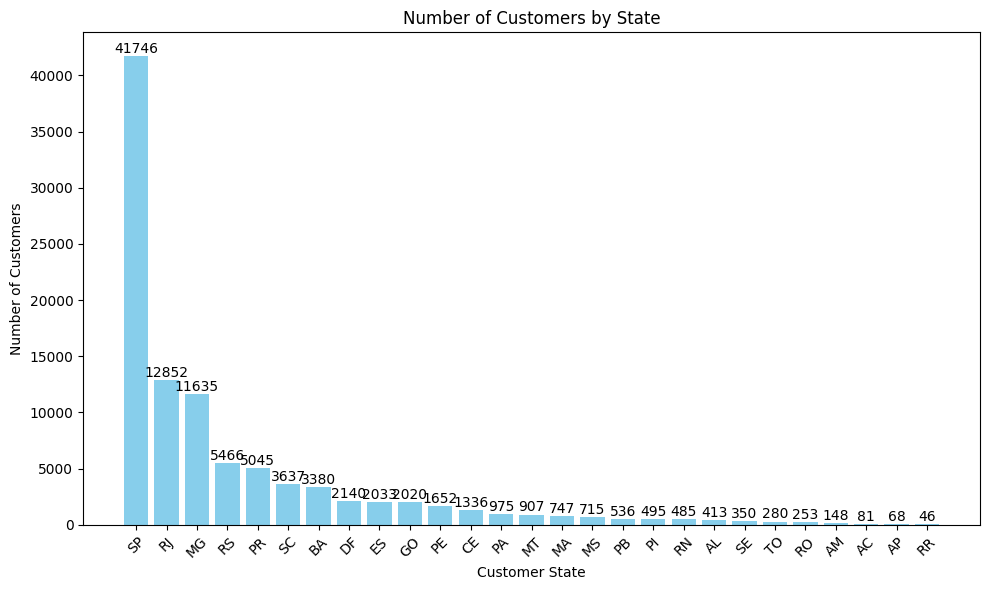

In [ ]:
customer_counts = customers.groupby('customer_state')['customer_id'] \
                          .nunique() \
                          .reset_index(name='customer_count')
customer_counts = customer_counts.sort_values('customer_count', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(customer_counts['customer_state'], customer_counts['customer_count'], color='skyblue')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             str(bar.get_height()), ha='center', va='bottom')

plt.xlabel('Customer State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Calculate the number of orders per month in 2018

<ipython-input-20-31363904c08f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2018['month'] = orders_2018['order_purchase_timestamp'].dt.month


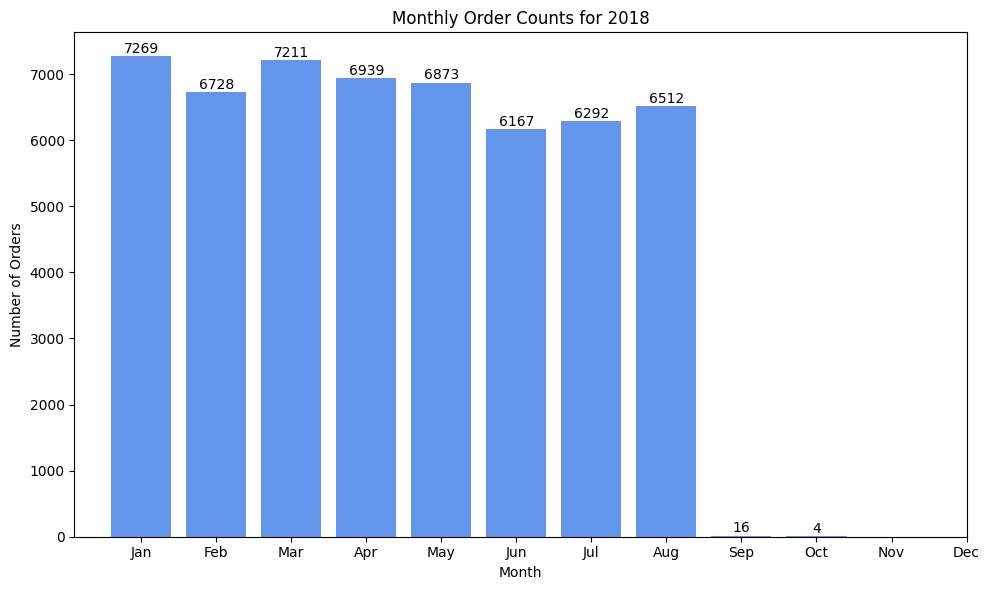

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
orders_2018['month'] = orders_2018['order_purchase_timestamp'].dt.month
monthly_orders = orders_2018.groupby('month')['order_id'].count().reset_index(name='order_count')
monthly_orders = monthly_orders.sort_values('month')

plt.figure(figsize=(10,6))
bars = plt.bar(monthly_orders['month'], monthly_orders['order_count'], color='cornflowerblue')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(bar.get_height()), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Counts for 2018')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

## Find the average number of products per order, grouped by customer city

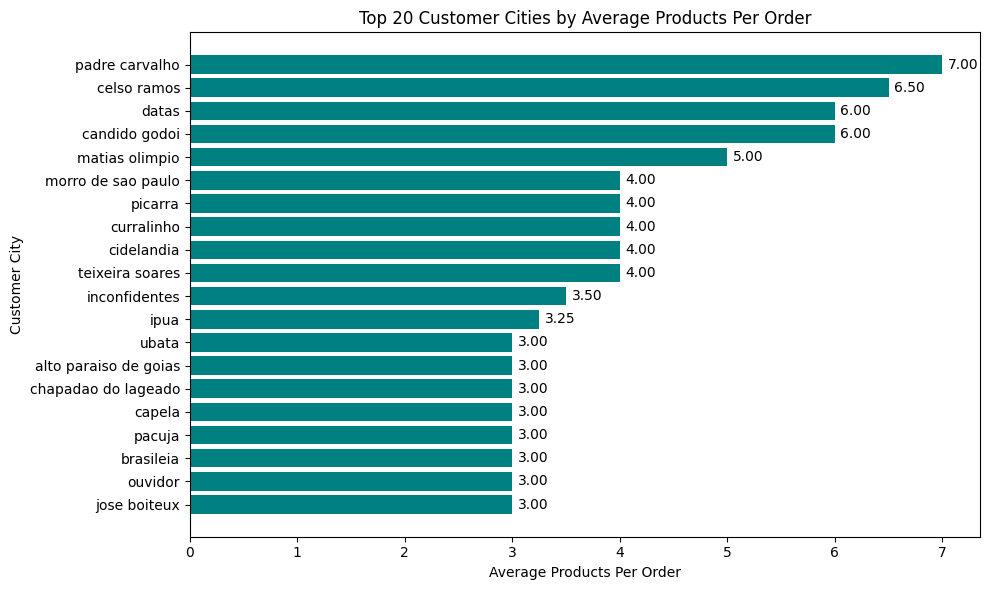

In [ ]:
product_counts = order_items.groupby('order_id')['product_id'].count().reset_index(name='product_count')
order_product_counts = orders[['order_id', 'customer_id']].merge(product_counts, on='order_id')
order_customer_products = order_product_counts.merge(customers[['customer_id', 'customer_city']], on='customer_id')
avg_products_city = order_customer_products.groupby('customer_city')['product_count'] \
                                          .mean() \
                                          .round(2) \
                                          .reset_index(name='avg_products_per_order')

avg_products_city = avg_products_city.sort_values('avg_products_per_order', ascending=False).head(20)
plt.figure(figsize=(10, 6))
bars = plt.barh(avg_products_city['customer_city'], avg_products_city['avg_products_per_order'], color='teal')

plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center')

plt.xlabel('Average Products Per Order')
plt.ylabel('Customer City')
plt.title('Top 20 Customer Cities by Average Products Per Order')
plt.tight_layout()
plt.show()

## Calculate the percentage of total revenue contributed by each product category

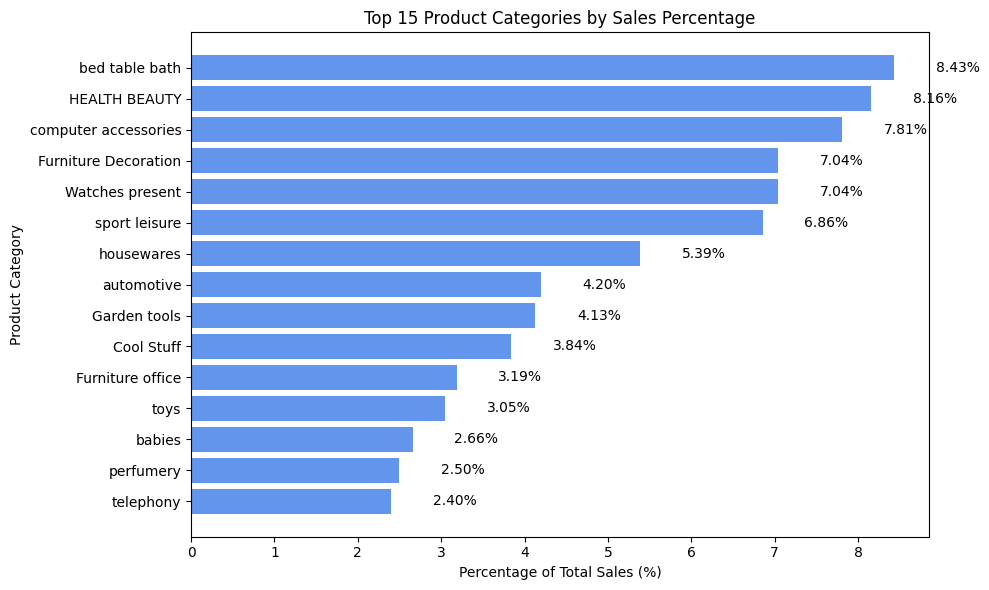

In [ ]:
merged_df = products.merge(order_items, on='product_id') \
                    .merge(payments, on='order_id')
total_payment_value = merged_df['payment_value'].sum()
category_payment = merged_df.groupby('product category')['payment_value'] \
                            .sum() \
                            .reset_index()
category_payment['percentage'] = (category_payment['payment_value'] / total_payment_value) * 100
top_15 = category_payment.sort_values('percentage', ascending=False).head(15)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_15['product category'], top_15['percentage'], color='cornflowerblue')

plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.xlabel('Percentage of Total Sales (%)')
plt.ylabel('Product Category')
plt.title('Top 15 Product Categories by Sales Percentage')
plt.tight_layout()
plt.show()

## Identify the correlation between product price and number of times a product has been purchased

In [ ]:
order_stats = order_items.groupby('order_id').agg(
    avg_value=('price', 'mean'),
    count_order=('order_id', 'count')
).reset_index()

correlation = order_stats['avg_value'].corr(order_stats['count_order'])

print(f"Correlation between average price and number of products per order: {correlation:.4f}")

Correlation between average price and number of products per order: -0.0585


## Calculate revenue generated by each seller and rank them by revenue

In [ ]:
order_items['total_price_freight'] = order_items['price'] + order_items['freight_value']

seller_revenue = order_items.groupby('seller_id')['total_price_freight'] \
                            .sum() \
                            .round(2) \
                            .reset_index(name='Total_Revenue')
seller_revenue['revenue_rank'] = seller_revenue['Total_Revenue'].rank(method='min', ascending=False).astype(int)

seller_revenue = seller_revenue.sort_values('revenue_rank')
seller_revenue

,seller_id,Total_Revenue,revenue_rank
857,4869f7a5dfa277a7dca6462dcf3b52b2,249640.70,1
1535,7c67e1448b00f6e969d365cea6b010ab,239536.44,2
1013,53243585a1d6dc2643021fd1853d8905,235856.68,3
881,4a3ca9315b744ce9f8e9374361493884,235539.96,4
3024,fa1c13f2614d7b5c4749cbc52fecda94,204084.73,5
...,...,...,...
1370,702835e4b785b67a084280efca355756,18.56,3091
869,4965a7002cca77301c82d3f91b82e1a9,16.36,3092
373,1fa2d3def6adfa70e58c276bb64fe5bb,15.90,3093
1465,77128dec4bec4878c37ab7d6169d6f26,15.22,3094


## Calculate the moving average of order values for each customer over their order history

In [ ]:
orders_payments = orders.merge(payments, on='order_id')
order_payment_sum = orders_payments.groupby(['customer_id', 'order_id', 'order_purchase_timestamp'])['payment_value'] \
                                   .sum() \
                                   .reset_index()
order_payment_sum = order_payment_sum.sort_values(['customer_id', 'order_purchase_timestamp'])

order_payment_sum['cumulative_avg_order_value'] = order_payment_sum.groupby('customer_id')['payment_value'] \
                                                                    .expanding() \
                                                                    .mean() \
                                                                    .reset_index(level=0, drop=True) \
                                                                    .round(2)
result = order_payment_sum[['customer_id', 'order_id', 'order_purchase_timestamp', 'cumulative_avg_order_value']] \
         .sort_values(['customer_id', 'order_purchase_timestamp'])

result

,customer_id,order_id,order_purchase_timestamp,cumulative_avg_order_value
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,2017-11-14 16:08:26,114.74
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,2017-07-16 09:40:32,67.41
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,2017-02-28 11:06:43,195.42
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,2017-08-16 13:09:20,179.35
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,2018-04-02 13:42:17,107.01
...,...,...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,2018-03-29 16:59:26,81.36
99436,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,2018-05-22 13:36:02,63.13
99437,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,2018-06-13 16:57:05,214.13
99438,ffffa3172527f765de70084a7e53aae8,d0e7be325a1c986babc4e1cdb91edc03,2017-09-02 11:53:32,45.50


## Calculate the cumilative sales per month for each year

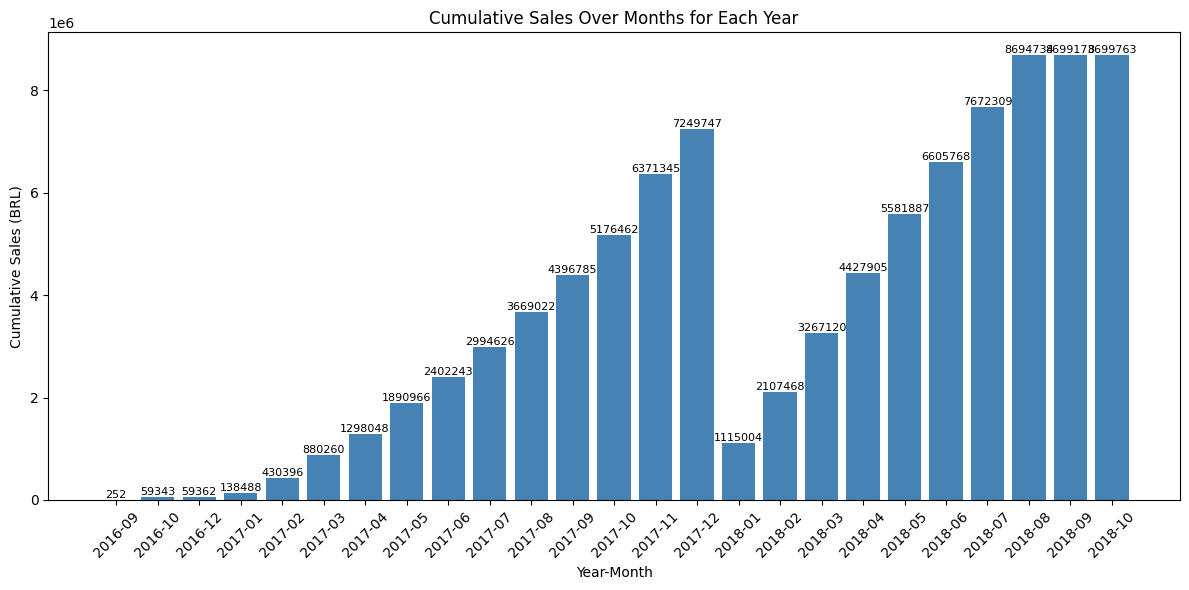

In [ ]:
orders_payments = orders.merge(payments, on='order_id')
orders_payments['sales_year'] = pd.to_datetime(orders_payments['order_purchase_timestamp']).dt.year
orders_payments['sales_month'] = pd.to_datetime(orders_payments['order_purchase_timestamp']).dt.month
monthly_sales = orders_payments.groupby(['sales_year', 'sales_month'])['payment_value'] \
                              .sum() \
                              .round(2) \
                              .reset_index(name='monthly_sales')
monthly_sales['cumulative_sales'] = monthly_sales.groupby('sales_year')['monthly_sales'] \
                                                 .cumsum() \
                                                 .round(2)
monthly_sales['year_month'] = monthly_sales['sales_year'].astype(str) + '-' + monthly_sales['sales_month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_sales['year_month'], monthly_sales['cumulative_sales'], color='steelblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Sales (BRL)')
plt.title('Cumulative Sales Over Months for Each Year')
plt.tight_layout()
plt.show()

## Calculate the year over year growth rate of total sales

In [ ]:
orders_payments = orders.merge(payments, on='order_id')
orders_payments['sales_year'] = pd.to_datetime(orders_payments['order_purchase_timestamp']).dt.year

yearly_sales = orders_payments.groupby('sales_year')['payment_value'] \
                              .sum() \
                              .round(2) \
                              .reset_index(name='total_sales')
yearly_sales['prev_year_sales'] = yearly_sales['total_sales'].shift(1)
yearly_sales['yoy_growth_percent'] = ((yearly_sales['total_sales'] - yearly_sales['prev_year_sales']) / yearly_sales['prev_year_sales']) * 100
yearly_sales['yoy_growth_percent'] = yearly_sales['yoy_growth_percent'].round(2)

yearly_sales

,sales_year,total_sales,prev_year_sales,yoy_growth_percent
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.7
2,2018,8699763.05,7249746.73,20.0


## Identify top 3 customers who spent most money in each year

In [ ]:
cust_orders_payments = customers.merge(orders, on='customer_id') \
                               .merge(payments, on='order_id')
cust_orders_payments['order_year'] = pd.to_datetime(cust_orders_payments['order_purchase_timestamp']).dt.year
grouped = cust_orders_payments.groupby(['customer_id', 'order_year'])['payment_value'] \
                              .sum() \
                              .round(2) \
                              .reset_index(name='total_spent')

grouped['rank_order'] = grouped.groupby('order_year')['total_spent'] \
                              .rank(method='dense', ascending=False)

top_customers_per_year = grouped[grouped['rank_order'] <= 3] \
                         .sort_values(['order_year', 'rank_order'])

top_customers_per_year

,customer_id,order_year,total_spent,rank_order
66073,a9dc96b027d1252bbac0a9b72d837fc6,2016,1423.55,1.0
11353,1d34ed25963d5aae4cf3d7f3a4cda173,2016,1400.74,2.0
28708,4a06381959b6670756de02e07b83815f,2016,1227.78,3.0
8546,1617b1357756262bfa56ab541c47bc16,2017,13664.08,1.0
77521,c6e2731c5b391845f6800c97401a43a9,2017,6929.31,2.0
24771,3fd6777bbce08a352fddd04e4a7cc8f6,2017,6726.66,3.0
91984,ec5b2ba62e574342386871631fafd3fc,2018,7274.88,1.0
95123,f48d464a0baaea338cb25f816991ab1f,2018,6922.21,2.0
87396,e0a2412720e9ea4f26c1ac985f6a7358,2018,4809.44,3.0


## Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
first_orders = orders.groupby('customer_id')['order_purchase_timestamp'] \
                     .min() \
                     .reset_index() \
                     .rename(columns={'order_purchase_timestamp': 'first_order_date'})
orders_with_first = orders.merge(first_orders, on='customer_id')

orders_with_first['within_6_months'] = (
    (orders_with_first['order_purchase_timestamp'] > orders_with_first['first_order_date']) &
    (orders_with_first['order_purchase_timestamp'] <= orders_with_first['first_order_date'] + pd.DateOffset(months=6))
)
repeat_customers = orders_with_first[orders_with_first['within_6_months']].customer_id.unique()
retention_rate_percentage = round(len(repeat_customers) * 100.0 / len(first_orders), 2)

print(f"Retention Rate (6 months): {retention_rate_percentage}%")

Retention Rate (6 months): 0.0%


# Conclusion

**Total Orders in 2017:**

The platform recorded a significant number of orders in 2017, indicating good early traction and growth during that year.

**Installment Payments:**

A good portion of customers chose to pay in multiple installments, showing that flexible payment options are important for user convenience.

**Category-wise Sales:**

Some product categories like bed_bath_table and health_beauty generated high total sales, while others like fashion_underwear_beach had very low sales.

**Revenue Contribution by Category:**

Categories such as watches_gifts and telephony contributed a large percentage to overall revenue, while several niche categories made up very little.

**Customer Distribution by State:**

Most customers are concentrated in states like São Paulo, while some states have very few customers, indicating regional usage patterns.

**Cumulative Sales Trend:**

The cumulative sales graphs show consistent monthly growth over each year, especially in 2018, which reflects increased customer activity and higher order volumes.

**Retention Rate:**

The retention rate within the first 6 months of a customer's first purchase is currently 0%, showing that users are not returning to make a second purchase soon after their first.

**Year-over-Year Sales Growth:**

Sales have increased each year, showing overall growth and success in attracting more customers or encouraging more purchases.

**Top Sellers by Revenue:**

A few sellers account for most of the revenue, with top sellers earning many times more than average ones. This shows a clear difference in seller performance.

**Top Customers by Spending:**

Every year, a few customers spend much more than others, and identifying these high-value customers can help with loyalty strategies.

# Recomendation

*   Since the 6-month repeat purchase rate is 0%, a retention strategy should be launched. This could include email follow-ups, offers, or loyalty programs.
*   Invest more in stocking and promoting best-selling categories like health_beauty or telephony to maximize returns.
*   Support and reward top sellers with better visibility or tools so they can keep contributing high revenue.
*   Launch marketing campaigns in states with fewer customers to spread platform usage more evenly across the country.
*   Promote installment payment options more clearly, as they seem to help increase customer spending and affordability.